In [196]:
import numpy as np
import matplotlib.pyplot as plt

In [197]:
data = np.loadtxt("ds2.txt", delimiter = ',')

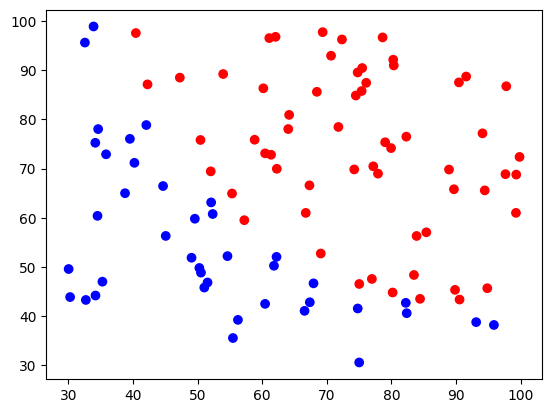

In [198]:
#rewriting data
X = data[:,0:-1]
X = np.hstack((np.ones((100,1)), X))
Y = data[:,-1]
col = np.where(Y == 1, 'r', 'b')
plt.scatter(X[:,1], X[:,2], c=col) 
Y = Y.reshape(-1,1)
m = len(Y)

In [199]:
#Sigmoid function
theta = np.zeros((1,3))
def sigmoid(z):
    h = 1/(1+np.exp(-z))
    return h

In [200]:
#cost function
def compute_cost(X_train, Y_train, theta):
    cost_sum = 0
    m = len(Y_train)
    for i in range (m):
        h = sigmoid(np.dot(theta, X_train[i]))
        cost = - Y_train[i]*np.log(h) - (1 - Y_train[i])*(np.log(1 - h))
        cost_sum = cost_sum + cost
    return cost_sum/100

In [206]:
#cost test
cost = compute_cost(X, Y, theta)
print(cost)

[0.69314718]


In [228]:
#gradients
def grad(X_train, Y_train, theta):
    h = np.zeros((m,1))
    for i in range (m):
        h[i] = sigmoid(np.dot(theta, X_train[i]))
    del_J = np.zeros((3,1))
    del_J = np.matmul(np.transpose(Y_train - h), X_train)
    return del_J/100

In [234]:
#gradients test
del_j = grad(X, Y, theta)
print(del_j)

[[ 0.1        12.00921659 11.26284221]]


In [230]:
#gradient descent
def grad_descent(X_train, Y_train, theta, alpha, num, grad):
    theta = theta
    m = len(Y_train)
    for i in range(m):
        delta_j = grad(X_train, Y_train, theta)
        theta = theta + alpha*delta_j
   # theta = theta.reshape(-1,1)
    
    return theta

In [238]:
theta = np.array([-8, -0.00229209, 0.00478527])
t = grad_descent(X, Y, theta, 0.001, 3000, grad)

In [239]:
c = compute_cost(X, Y, t)
print(c)

[0.30542341]


In [240]:
print(t)

[[-8.00103504  0.06978275  0.06335105]]


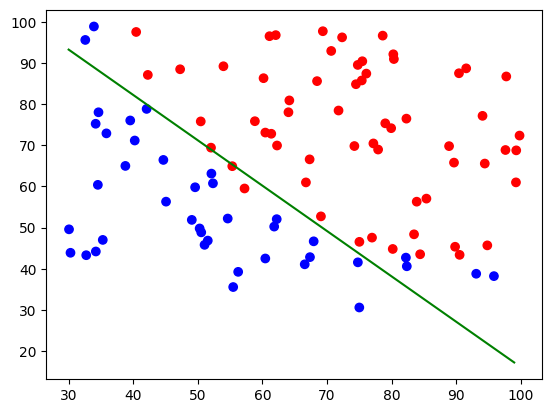

In [265]:
a = np.arange(30,100)
b = - (t[0,0] + t[0,1]*a)/t[0,2]
plt.plot(a, b, c = 'g')
X = data[:,0:-1]
X = np.hstack((np.ones((100,1)), X))
Y = data[:,-1]
col = np.where(Y == 1, 'r', 'b')
plt.scatter(X[:,1], X[:,2], c=col) 